In [117]:
import pandas as pd
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display the column names
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [118]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [119]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [120]:
import numpy as np

# Convert the specified columns to a NumPy array
MD_x = mcdonalds.iloc[:, :11]

MD_t = mcdonalds.iloc[:, :11].values
# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)
MD_t = (MD_t == "Yes").astype(int)
# Calculate the column means and round them to 2 decimal places

column_means = np.round(np.mean(MD_x, axis=0), 2)
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [121]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(MD_x)

# Extract PCA results
SD = np.round(np.sqrt(pca.explained_variance_),4)
PV = np.round(pca.explained_variance_ratio_,4)
CV = PV.cumsum()

index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.7570,0.2994,0.2994
PC2,0.6075,0.1928,0.4922
PC3,0.5046,0.1330,0.6252
PC4,0.3988,0.0831,0.7083
PC5,0.3374,0.0595,0.7678
PC6,0.3103,0.0503,0.8181
PC7,0.2897,0.0438,0.8619
PC8,0.2751,0.0395,0.9014
PC9,0.2653,0.0368,0.9382
PC10,0.2488,0.0324,0.9706


In [122]:
print("Standard Deviation:\n",SD.round(1))

# Get the rotation matrix (components matrix)
rotation_matrix = np.round(pca.components_, 3)

# Print the rotation matrix
print("Rotation (n x k) = (11 x 11):")

rotation_df = pd.DataFrame(rotation_matrix, index=MD_x.columns.values, columns=index)
rotation_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (11 x 11):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,-0.155,-0.006,0.116,0.304,-0.108,-0.337,-0.472,0.329,-0.214,0.375
convenient,0.364,0.016,0.019,-0.034,-0.064,-0.087,-0.611,0.307,0.601,0.077,-0.140
spicy,-0.304,-0.063,-0.037,-0.322,-0.802,-0.065,-0.149,-0.287,0.024,0.192,-0.089
fattening,0.055,-0.142,0.198,-0.354,0.254,-0.097,0.119,-0.003,0.068,0.763,0.370
greasy,-0.308,0.278,0.071,-0.073,0.361,0.108,-0.129,-0.211,-0.003,0.288,-0.729
fast,0.171,-0.348,-0.355,-0.407,0.209,-0.595,-0.103,-0.077,-0.261,-0.178,-0.211
cheap,-0.281,-0.060,0.708,-0.386,0.036,-0.087,-0.040,0.360,-0.068,-0.350,-0.027
tasty,0.013,-0.113,0.376,0.590,-0.138,-0.628,0.140,-0.073,0.030,0.176,-0.167
expensive,0.572,-0.018,0.400,-0.161,-0.003,0.166,0.076,-0.639,0.067,-0.186,-0.072
healthy,-0.110,-0.666,-0.076,-0.005,0.009,0.240,0.428,0.079,0.454,-0.038,-0.290


In [123]:
pip install bioinfokit

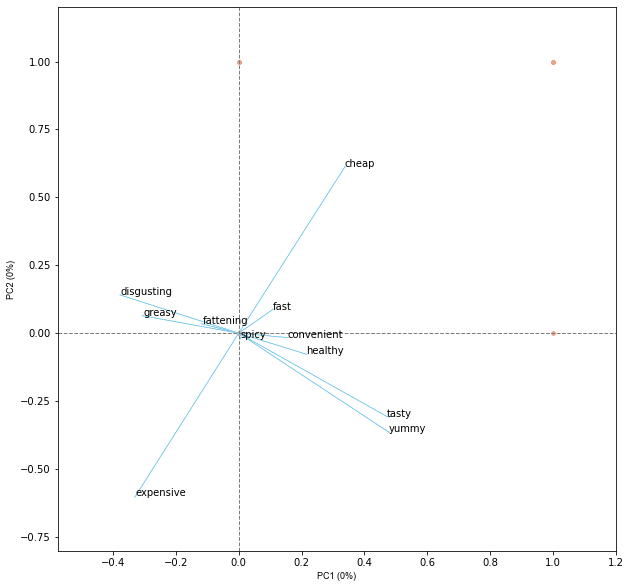

In [124]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=MD_t, loadings=-rotation_matrix, labels=mcdonalds.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

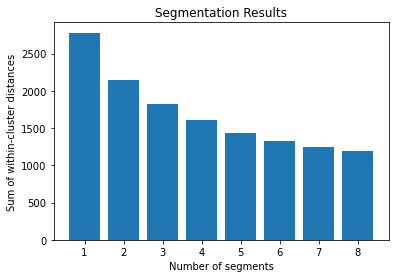

In [125]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1234)

nrep = 10
# Perform K-means clustering for different numbers of cluster
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

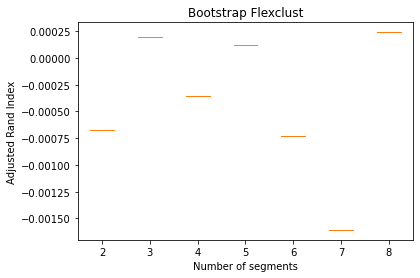

In [126]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score


np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

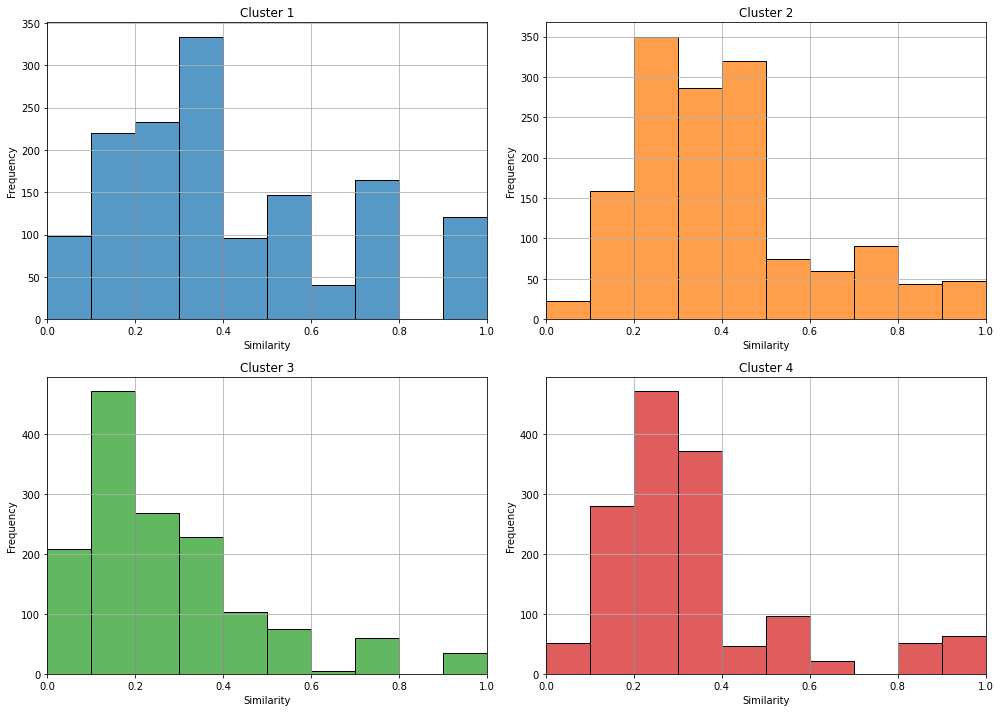

In [127]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# Perform K-means clustering for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
labels = kmeans.labels_

# Calculate the distances to the cluster centers
distances = kmeans.transform(MD_x)

# Convert distances to probabilities (scaled to 0-1 range)
scaler = MinMaxScaler()
probabilities = scaler.fit_transform(1 / (1 + distances))

# Plot individual histograms for each cluster's membership probability
plt.figure(figsize=(14, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(probabilities[:, i], kde=False, bins=10, color=plt.cm.tab10(i))
    plt.xlim(0, 1)
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')
    plt.title(f'Cluster {i + 1}')
    plt.grid(True)

plt.tight_layout()
plt.show()

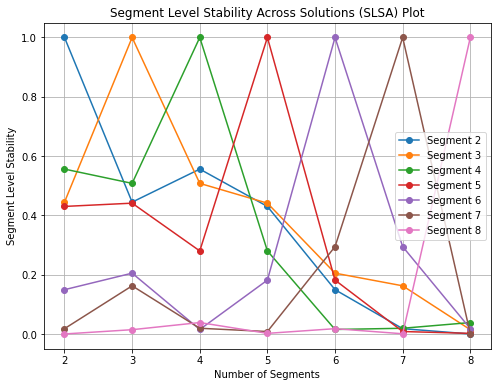

In [128]:
# Define the range for the number of segments to analyze
num_segments = range(2, 9)

# Initialize an empty list to store the stability of each segment
segment_stability = []

# Loop through each segment number in the specified range
for segment in num_segments:
    # Predict the labels for the current number of segments using the MD_km28 model
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    # Append the predicted labels to the segment stability list
    segment_stability.append(labels_segment)

# Set up the figure size for the plot
plt.figure(figsize=(8, 6))

# Plot the stability of each segment across the different numbers of segments
for i, segment in enumerate(num_segments):
    plt.plot(num_segments, 
             [np.mean(segment_stability[i] == labels) for labels in segment_stability], 
             marker='o', 
             label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')

# Customize the x-ticks to match the number of segments
plt.xticks(num_segments)

plt.legend()
plt.grid(True)

plt.show()


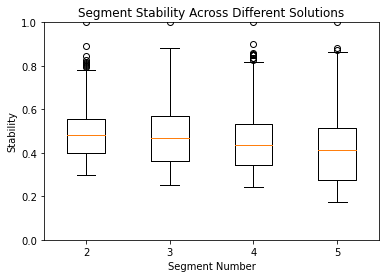

In [129]:
# Define segment solutions and initialize dictionaries for storing labels and similarities
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

# Compute segment labels and similarity values for each segment
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

# Calculate normalized similarity values for segment stability
stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    stability_values.append(normalized_similarities)

# Plotting the segment stability values
plt.boxplot(stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Stability Across Different Solutions")

plt.show()

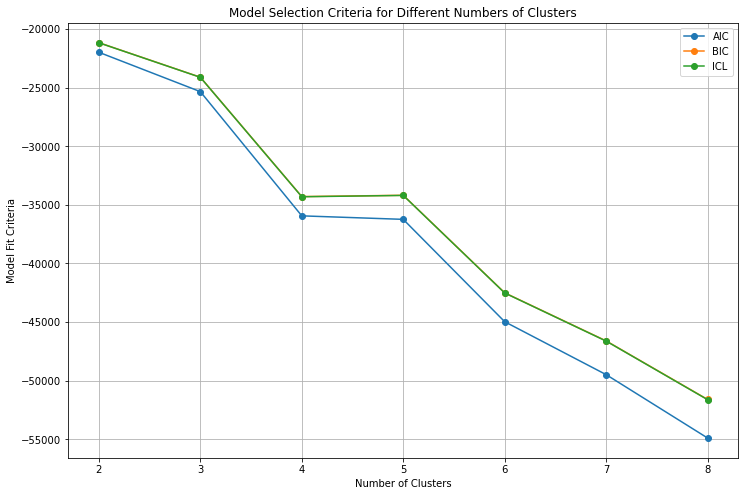

In [130]:
from sklearn.mixture import GaussianMixture


# Define the range of clusters to test
cluster_range = range(2, 9)

# Store the model metrics for each number of clusters
aic_values = []
bic_values = []
icl_values = []

for n_clusters in cluster_range:
    # Fit a Gaussian Mixture Model (similar to FLXMCmvbinary in Flexmix)
    model = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    model.fit(MD_x)
    
    # Compute AIC and BIC
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))
    
    # Compute ICL as BIC - Log-Likelihood
    log_likelihood = model.score(MD_x)
    icl_values.append(bic_values[-1] - log_likelihood)

# Plot the model selection criteria
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, aic_values, marker='o', label='AIC')
plt.plot(cluster_range, bic_values, marker='o', label='BIC')
plt.plot(cluster_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Clusters')
plt.ylabel('Model Fit Criteria')
plt.title('Model Selection Criteria for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit a Mixture model with 4 components (to match the "4" cluster solution)
mixture_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
mixture_labels = mixture_model.fit_predict(MD_x)

# Create a contingency table to compare the cluster assignments
contingency_table = pd.crosstab(kmeans_labels, mixture_labels, rownames=['K-Means'], colnames=['Mixture'])

print(contingency_table)

Mixture    0   1   2    3
K-Means                  
0        449   3  46   28
1        288  36   9   40
2          0  87   0  152
3          0   6  71  238


In [132]:
# Fit the first Mixture model with 4 components (to match the "4" cluster solution)
mixture_model1 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
mixture_model1.fit(MD_x)

# Fit the second Mixture model using K-Means clusters as initial clusters
mixture_model2 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
mixture_model2.fit(MD_x)

# Compute the log-likelihood for both models
log_likelihood_m4 = mixture_model1.score(MD_x) * MD_x.shape[0]
log_likelihood_m4a = mixture_model2.score(MD_x) * MD_x.shape[0]

# Print the log-likelihood values
print("Log-Likelihood for MD.m4:", log_likelihood_m4)
print("Log-Likelihood for MD.m4a:", log_likelihood_m4a)

Log-Likelihood for MD.m4: 18280.1151013434
Log-Likelihood for MD.m4a: 18280.1151013434


In [133]:
# Get the counts of each category in the 'Like' column and reverse the order
like_counts = mcdonalds['Like'].value_counts(ascending=False)

# Reverse the order to match the R 'rev' function
like_counts_reversed = like_counts[::-1]

print(like_counts_reversed)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [134]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}


mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)



# # Convert the 'Like' column to numeric (assuming it's ordered as in R)
# mcdonalds['Like.n'] = pd.Categorical(mcdonalds['Like']).codes

# Count the occurrences of each value in the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

print(like_n_counts)


 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [135]:
from patsy import dmatrices

# Combine the names of the first 11 columns with '+'
f = " + ".join(mcdonalds.columns[:11])

# Create the full formula string
formula = f"Like ~ {f}"

# Convert the string into a formula using patsy (if needed for a model)
# For example, to create design matrices
y, X = dmatrices(formula, data=mcdonalds)

print(formula)

Like ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [136]:
# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Output model details
print(gmm)

cluster_sizes = np.bincount(gmm.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, random_state=1234)
Cluster sizes:
1: 468
2: 985


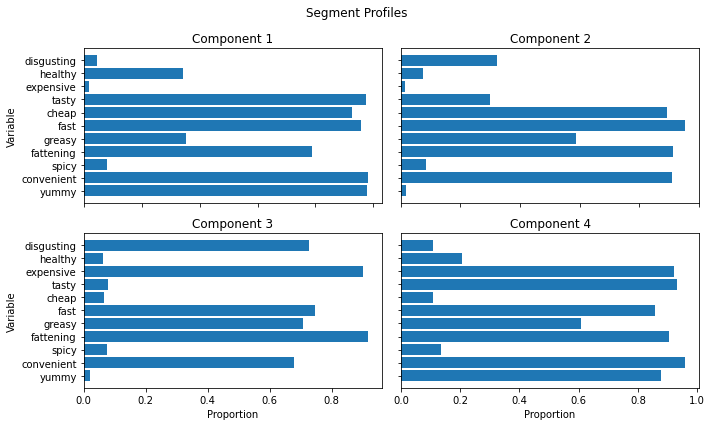

In [137]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

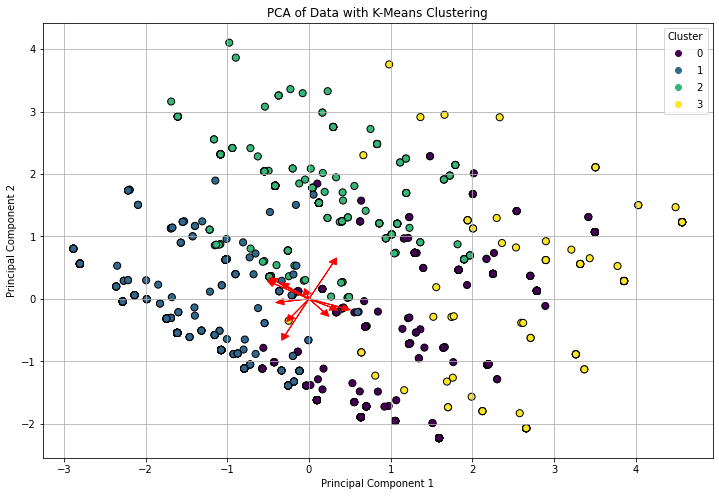

In [138]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Fit K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x_scaled)

# Plot PCA results with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Data with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)

# Add PCA projection axes
for i in range(MD_x_scaled.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              head_width=0.1, head_length=0.1, fc='red', ec='red')

plt.show()

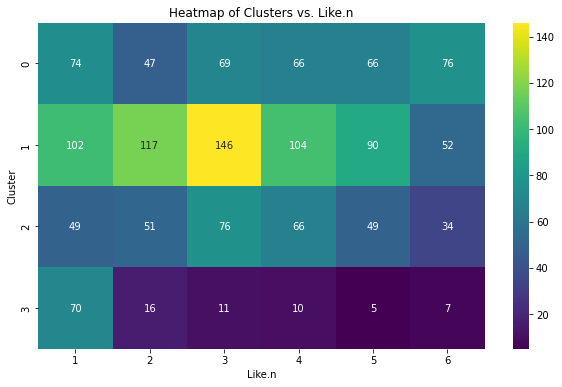

In [139]:
# Create a DataFrame for analysis
mcdonalds['Cluster'] = clusters

# Clean the 'Like' column
# Remove non-numeric characters and convert to numeric, handling errors
mcdonalds['Like'] = mcdonalds['Like'].str.extract('(\d+)', expand=False)  # Extract numeric part
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')  # Convert to numeric

# Replace NaNs with a default value or drop them
mcdonalds['Like'].fillna(0, inplace=True)  # Optionally fill NaNs with 0

# Create a new variable 'Like.n'
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Create contingency table
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like.n'])

# Plot heatmap equivalent to mosaic plot
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=True, 
            xticklabels=contingency_table.columns, yticklabels=contingency_table.index)

plt.title('Heatmap of Clusters vs. Like.n')
plt.xlabel('Like.n')
plt.ylabel('Cluster')
plt.show()

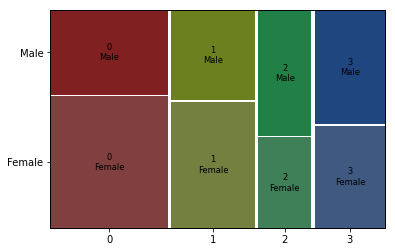

In [140]:
MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

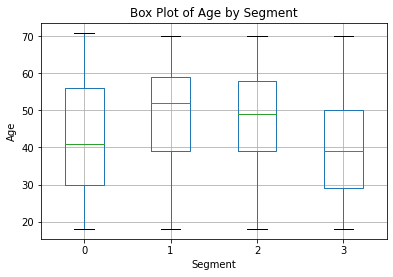

In [141]:
# Create a DataFrame with segment and age information
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

# Generate a box plot of age grouped by segment
df.boxplot(column='Age', by='Segment')
plt.title('Box Plot of Age by Segment')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

In [142]:
# Ensure 'VisitFrequency' and 'Cluster' columns are numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')
mcdonalds['Cluster'] = pd.to_numeric(mcdonalds['Cluster'], errors='coerce')

# Compute the mean VisitFrequency for each cluster
visit_mean = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()

# Display the result
print(visit_mean)

Cluster
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [143]:
# Ensure 'Like.n' and 'Cluster' columns are numeric
mcdonalds['Like.n'] = pd.to_numeric(mcdonalds['Like.n'], errors='coerce')
mcdonalds['Cluster'] = pd.to_numeric(mcdonalds['Cluster'], errors='coerce')

# Compute the mean Like.n for each cluster
like_mean = mcdonalds.groupby('Cluster')['Like.n'].mean()

# Display the result
print(like_mean)

Cluster
0    3.580402
1    3.194763
2    3.360000
3    2.033613
Name: Like.n, dtype: float64


In [144]:
# Convert 'Gender' to binary (1 for Female, 0 for Male)
mcdonalds['IsFemale'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Ensure 'IsFemale' and 'Cluster' columns are numeric
mcdonalds['IsFemale'] = pd.to_numeric(mcdonalds['IsFemale'], errors='coerce')
mcdonalds['Cluster'] = pd.to_numeric(mcdonalds['Cluster'], errors='coerce')

# Compute the mean of IsFemale for each cluster
female_mean = mcdonalds.groupby('Cluster')['IsFemale'].mean()

# Display the result
print(female_mean)

Cluster
0    0.535176
1    0.600655
2    0.473846
3    0.453782
Name: IsFemale, dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


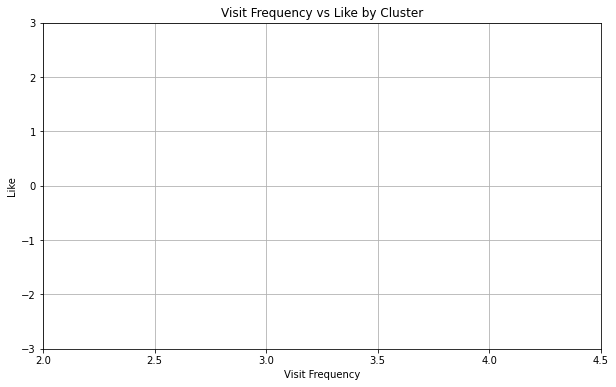

In [145]:

# Convert necessary columns to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')
mcdonalds['Like.n'] = pd.to_numeric(mcdonalds['Like.n'], errors='coerce')
mcdonalds['IsFemale'] = (mcdonalds['Gender'] == 'Female').astype(int)
mcdonalds['Cluster'] = pd.to_numeric(mcdonalds['Cluster'], errors='coerce')

# Compute means for each cluster
visit_mean = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()
like_mean = mcdonalds.groupby('Cluster')['Like.n'].mean()
female_mean = mcdonalds.groupby('Cluster')['IsFemale'].mean()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'VisitFrequency': visit_mean,
    'Like': like_mean,
    'Female': female_mean
})

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    plot_data['VisitFrequency'], 
    plot_data['Like'], 
    s=10 * plot_data['Female'],  # Size of points proportional to 'Female'
    alpha=0.7
)

# Adding labels to each point
for i in range(len(plot_data)):
    plt.text(
        plot_data['VisitFrequency'].iloc[i],
        plot_data['Like'].iloc[i],
        str(i + 1),  # Label points with cluster numbers (1, 2, 3, 4)
        fontsize=12,
        ha='right'
    )

# Set axis limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Visit Frequency vs Like by Cluster')
plt.grid(True)

# Show plot
plt.show()